### 딥러닝 입문
* keras를 이용한 딥러닝을 이용한 손글씨 인식
* MNIST 데이터 셋을 활용하여 간단한 딥러닝 모델을 구현
* Tensorflow, Keras, Pytorch

##### google colab
    tensorflow 2.8.0
    keras 2.8.0
    python 3.7.13

In [1]:
# 01 라이브러리 임포트

import tensorflow as tf
import keras
import sys

print(tf.__version__)
print(keras.__version__)
print(sys.version)

2.8.2
2.8.0
3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [2]:
### 라이브러리 확인
import numpy        # 선형대수 관련(배열 생성 관련)
import matplotlib   # 시각화

In [3]:
# 02 케라스 이해하기

# 사용할 패키지 불러오기
from keras.utils import np_utils     
from keras.datasets import mnist    
from keras.models import Sequential  
from keras.layers import Dense, Activation 

# 데이터셋 생성하기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# 03 손글씨 데이터 시각화
   # y_train : 손글씨 그림의 숫자(0~9) 정보
   # x_train : 손글씨 그림의 픽셀정보(28x28) 총 784개의 픽셀정보

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


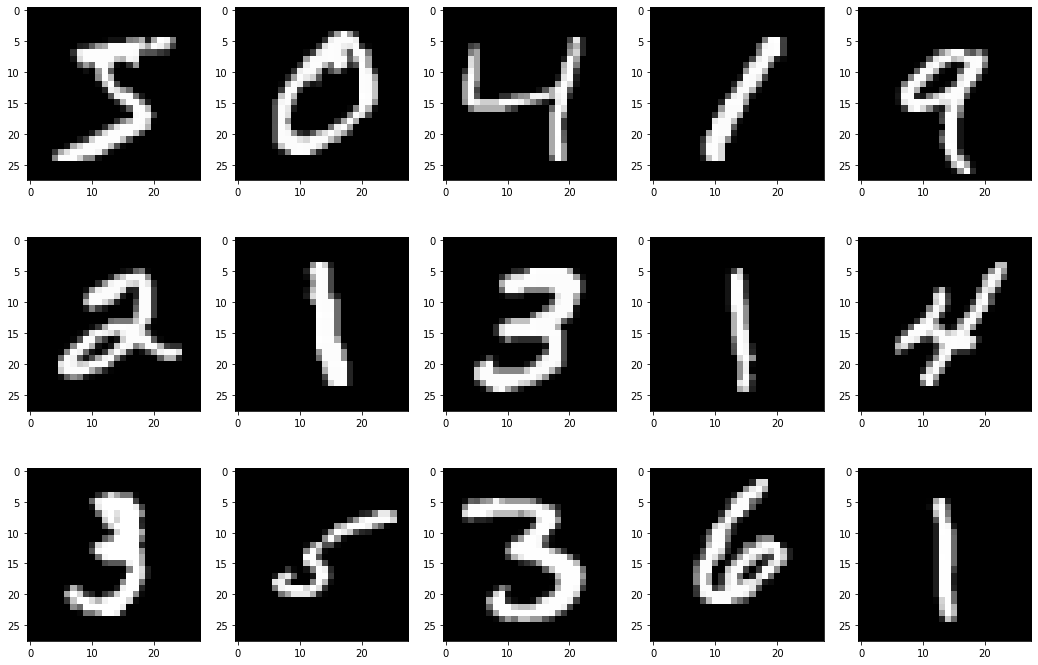

In [5]:
figure,axes = plt.subplots(nrows=3, ncols=5)  # 3행 5열의 구조 
figure.set_size_inches(18,12)  # 전체 크기

plt.gray()
print("label={}".format(y_train[0:15]))   # x데이터 0~14개 가져오기

col = 0
for row in range(0,3):
    col = row * 5
    axes[row][0].imshow(X_train[col])  # 0,5,10의 값을 갖는 위치 값 이미지 표시
    axes[row][1].imshow(X_train[col+1])# 1,6,11의 값을 갖는 위치 값 이미지 표시
    axes[row][2].imshow(X_train[col+2])# 2,7,12의 값을 갖는 위치 값 이미지 표시
    axes[row][3].imshow(X_train[col+3])# 3,8,13의 값을 갖는 위치 값 이미지 표시
    axes[row][4].imshow(X_train[col+4])# 4,9,114의 값을 갖는 위치 값 이미지 표시

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


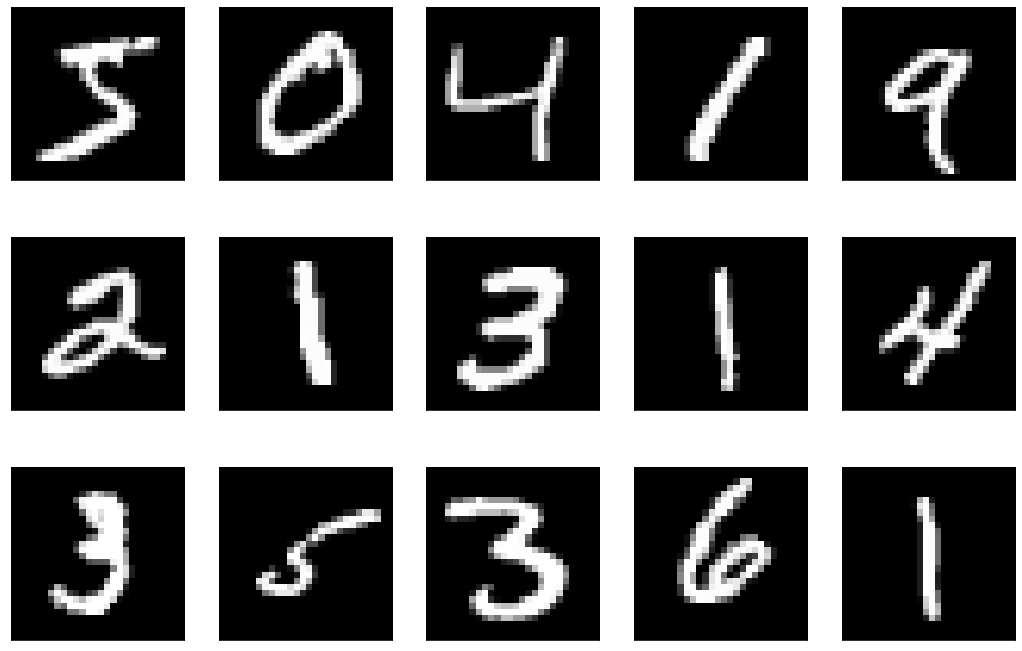

In [6]:
# 좀 더 간단히 시각화하기

fig, axes = plt.subplots(3, 5, figsize=(18,12),
                        subplot_kw= {'xticks':(), 'yticks':() })

print("label={}".format(y_train[0:15]))   # x데이터 0~14개 가져오기

for image, ax in zip( X_train, axes.ravel() ):
    ax.imshow(image) # 이미지 표시

In [7]:
# 데이터 처리
  # 입력 데이터 : x_train, x_test (60000, 28, 28) -> (60000, 784)
  # 레이블 데이터 : y_train, y_test 숫자(0~9)를 2진 벡터형태로 변경( 0 0 0 0 1 0 0 0 0 0)

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [8]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [9]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [10]:
# 4. 모델 학습시키기
# validation_data : 모델을 학습할때는 기본 데이터를 이용하고, 평가시에 사용할 데이터를 지정
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 15.2257 - accuracy: 0.1610 - val_loss: 2.2667 - val_accuracy: 0.1747
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1571 - accuracy: 0.1924 - val_loss: 2.0657 - val_accuracy: 0.2191
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2486 - accuracy: 0.1509 - val_loss: 2.3006 - val_accuracy: 0.1144
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3049 - accuracy: 0.1181 - val_loss: 2.3008 - val_accuracy: 0.1136
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3008 - val_accuracy: 0.1136
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3008 - val_accuracy: 0.1136
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3008 - val_accuracy

In [11]:
# 5. 학습과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])        # 'val_loss' : 평가셋 손실값
print(hist.history['accuracy'])    # 'val_acc'  : 평가셋 정확도

## training loss and acc ##
[15.225737571716309, 2.1571054458618164, 2.2486135959625244, 2.3049066066741943, 2.3013439178466797, 2.301239252090454, 2.3012194633483887, 2.301225423812866, 2.3012242317199707, 2.3012237548828125]
[0.16101667284965515, 0.19236665964126587, 0.15086667239665985, 0.11806666851043701, 0.11238333582878113, 0.11238333582878113, 0.11238333582878113, 0.11238333582878113, 0.11238333582878113, 0.11238333582878113]


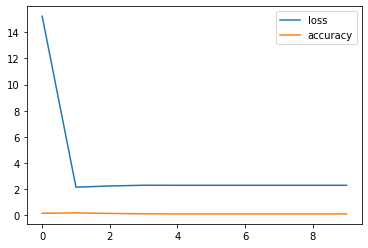

In [12]:
plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['accuracy'], label="accuracy")
plt.legend()

In [13]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

313/313 [==============================] - 1s 2ms/step - loss: 2.3009 - accuracy: 0.1136
## evaluation loss and_metrics ##
[2.3008618354797363, 0.1136000007390976]


##### 실습 과제
    가. 픽셀값을 0~255를 0~1사이로 변경해 보기
    나. epoch=10 -> 20를 변경하면 해 보자. 어떤 현상이 발생되는가?
    다. batch_size=32 -> 16를 변경한 이후에 해 보자.

### MNIST 분류 모델 만들기 - 신경망

In [14]:
# 01 라이브러리 임포트 및 데이터 준비
from keras.datasets import mnist
from keras.utils import np_utils

import numpy
import sys
import tensorflow as tf

# 난수 생성기의 패턴이 지정되지 않았을때, 
print( numpy.random.rand(4) )
print( numpy.random.rand(4) )

[0.29063033 0.12770785 0.63981896 0.94161424]
[0.99715183 0.69448731 0.33767106 0.70565304]


In [15]:
# 난수 생성기 패턴 지정
numpy.random.seed(0)
print( numpy.random.rand(4) )
numpy.random.seed(0)
print( numpy.random.rand(4) )

[0.5488135  0.71518937 0.60276338 0.54488318]
[0.5488135  0.71518937 0.60276338 0.54488318]


In [16]:
# 난수 패턴기의 패턴이 지정이 되면 같은 난수가 발생된다.

In [17]:
# 데이터 다운로드
# 처음 다운일 경우, 데이터 다운로드 시간이 걸릴 수 있음. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


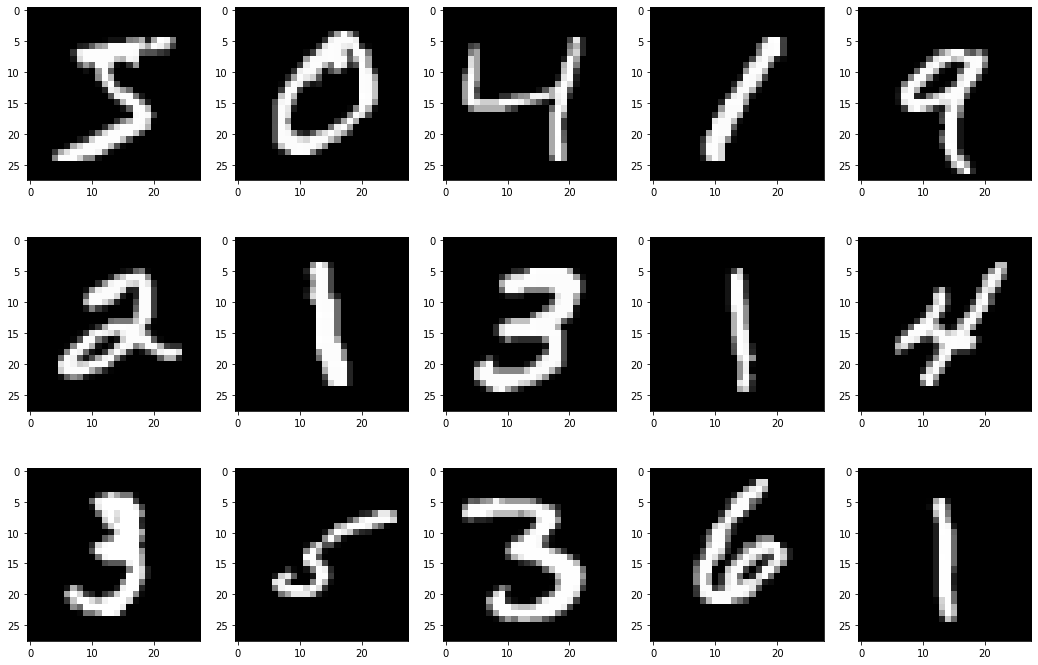

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 5, figsize=(18,12) )

print("label={}".format(y_train[0:15]))   # x데이터 0~14개 가져오기

for image, ax in zip( X_train, axes.ravel() ):
    ax.imshow(image) # 이미지 표시

In [19]:
# X_train의 데이터 정보를 하나 보기

print(X_train.shape)  # 60000 만개, 28행, 28열
X_train[0].shape

(60000, 28, 28)


(28, 28)

In [20]:
# 02 데이터 전처리

# 신경망에 맞추어 주기 위한 데이터 전처리
  # 학습 데이터
  # 테스트 데이터

# 입력 데이터의 텐서형 변경 및 값의 범위 조정
X_train = X_train.reshape(X_train.shape[0],784)   # 60000, 28, 28 -> 60000, 784로 변경
# 데이터 값의 범위 0~255 -> 0~1 
X_train.astype('float64') 
X_train = X_train/255

# 한줄 표현 - 이렇게도 가능
# X_train = X_train.reshape(X_train.shape[0],784).astype('float64') / 255

In [21]:
import numpy as np
print(X_train.shape)               # 데이터 크기
print("데이터의 최대, 최소 :", np.min(X_train), np.max(X_train) )  # 값의 범위

(60000, 784)
데이터의 최대, 최소 : 0.0 1.0


In [22]:
# 테스트 데이터 전처리
X_test = X_test.reshape(X_test.shape[0],784)
X_test.astype('float64')
X_test = X_test/255

In [23]:
print(X_test.shape)               # 데이터 크기
np.min(X_test), np.max(X_test)    # 값의 범위

(10000, 784)


(0.0, 1.0)

In [24]:
# 출력데이터 검증을 위해 10진수의 값을 One-Hot Encoding을 수행

# OneHotEncoding - 10진수의 값을 0, 1의 값을 갖는 벡터로 표현
y_train_1D = np_utils.to_categorical(y_train, 10)
y_test_1D = np_utils.to_categorical(y_test, 10)

In [25]:
# 변환 전과 후
y_train[0:4]

array([5, 0, 4, 1], dtype=uint8)

In [26]:
y_train_1D[0:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
# 03 딥러닝 모델 구축하기

from keras.models import Sequential
from keras.layers import Dense

m = Sequential()
m.add(Dense(512,input_dim=784, activation='relu'))
m.add(Dense(128, activation='relu') )
m.add(Dense(10,activation='softmax'))  #softmax

In [28]:
# 오차함수 :categorical_crossentropy, 최적화 함수 : adam

m.compile(loss="categorical_crossentropy", 
         optimizer='adam',
         metrics=['accuracy'])

### 배치 사이즈 200, epochs 30회 실행,
history = m.fit(X_train, y_train_1D, validation_data=(X_test, y_test_1D),
                epochs=30,
                batch_size=200,
                verbose=1)

Epoch 1/30
300/300 [==============================] - 6s 17ms/step - loss: 0.2705 - accuracy: 0.9225 - val_loss: 0.1276 - val_accuracy: 0.9610
Epoch 2/30
300/300 [==============================] - 6s 19ms/step - loss: 0.0965 - accuracy: 0.9712 - val_loss: 0.0818 - val_accuracy: 0.9738
Epoch 3/30
300/300 [==============================] - 7s 23ms/step - loss: 0.0601 - accuracy: 0.9822 - val_loss: 0.0678 - val_accuracy: 0.9776
Epoch 4/30
300/300 [==============================] - 5s 18ms/step - loss: 0.0436 - accuracy: 0.9867 - val_loss: 0.0662 - val_accuracy: 0.9795
Epoch 5/30
300/300 [==============================] - 5s 17ms/step - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.0626 - val_accuracy: 0.9800
Epoch 6/30
300/300 [==============================] - 5s 16ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 0.0700 - val_accuracy: 0.9786
Epoch 7/30
300/300 [==============================] - 5s 17ms/step - loss: 0.0164 - accuracy: 0.9951 - val_loss: 0.0626 - val_accuracy: 0.9821

In [29]:
print("학습용 데이터 셋 Accuracy : %.4f" %(m.evaluate(X_train, y_train_1D)[1]))
print("테스트용 데이터 셋 Accuracy : %.4f" %(m.evaluate(X_test, y_test_1D)[1]))

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0016 - accuracy: 0.9995
학습용 데이터 셋 Accuracy : 0.9995
313/313 [==============================] - 2s 5ms/step - loss: 0.0965 - accuracy: 0.9817
테스트용 데이터 셋 Accuracy : 0.9817


In [30]:
pred = m.predict(X_test)

In [31]:
print( pred.shape )
print( "예측값 : ", pred[1] )
print( "예측값 중 가장 높은 값의 위치 : ", np.argmax(pred[1]) )

(10000, 10)
예측값 :  [2.5327579e-17 9.5882302e-11 1.0000000e+00 4.9637797e-18 1.1092856e-33
 2.9899244e-17 5.1189107e-16 5.5316652e-27 3.8754281e-15 5.2013008e-26]
예측값 중 가장 높은 값의 위치 :  2


### 케라스로 딥러닝 모델 만들기

In [32]:
import tensorflow as tf
import keras as keras
import sys

print(tf.__version__)
print(keras.__version__)
print(sys.version)

2.8.2
2.8.0
3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [33]:
from keras.datasets import mnist           # 데이터 셋 불러오기
from keras.models import Sequential        
from keras.layers import Dense, Activation 
from keras.utils import np_utils

In [34]:
### 데이터 셋 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train_n = X_train.copy()
y_train_n = y_train.copy()
X_test_n = X_test.copy()
y_test_n = y_test.copy()

# 데이터 셋 크기
# 60000개의 학습용 데이터 셋, 10000개의 테스트 데이터 셋
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [35]:
import matplotlib.pyplot as plt

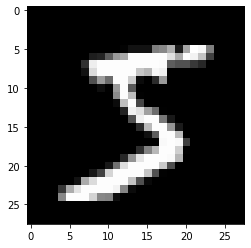

In [36]:
### x_train 의 하나의 데이터 확인
### 60000장의 이미지( 28, 28 숫자데이터)

plt.imshow(X_train[0])

In [37]:
# 10개의 y_train 데이터 셋 확인

print("label={}".format(y_train[0:10]))   # y 레이블 데이터 0~10개 확인

label=[5 0 4 1 9 2 1 3 1 4]


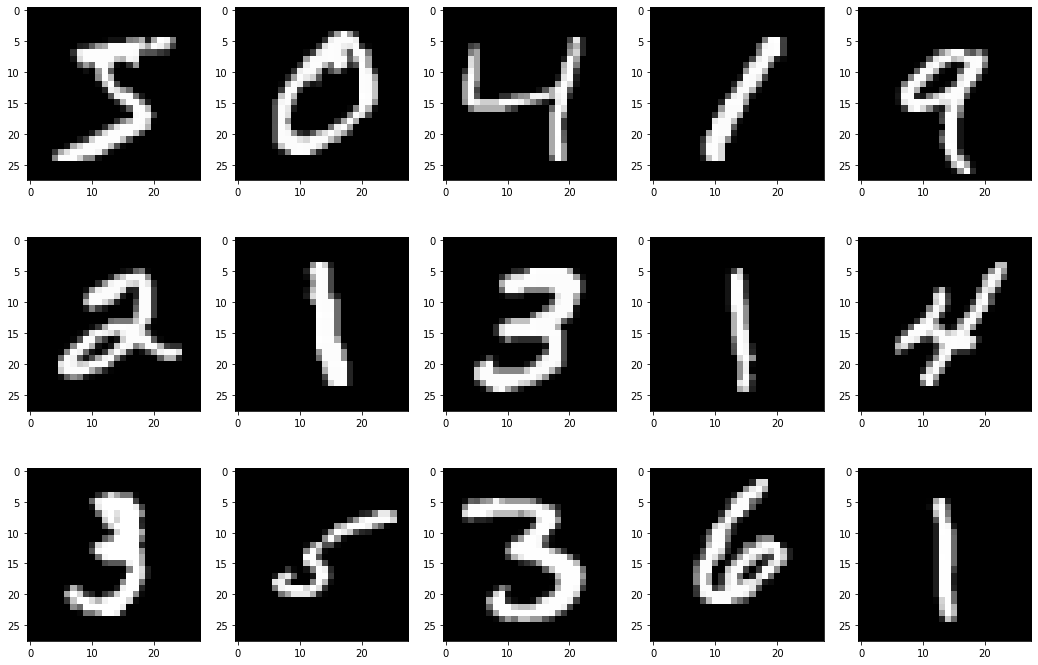

In [38]:
fig, axes = plt.subplots(3, 5, figsize=(18,12) )
for image, ax in zip( X_train, axes.ravel() ):
    ax.imshow(image) # 이미지 표시

In [39]:
## 데이터 셋의 변경 60000, 28, 28  -> 60000, 784 (28*28)
## 데이터 셋의 변경 10000, 28, 28  -> 10000, 784 (28*28)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

## 데이터 셋의 변경 60000,   -> 60000, 10 (28*28)
## 데이터 셋의 변경 10000,   -> 10000, 10 (28*28)
print(y_train.shape, y_test.shape)
print(y_train[0:5])
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape, y_test.shape)
print(y_train[0:5])

(60000,) (10000,)
[5 0 4 1 9]
(60000, 10) (10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [40]:
## 데이터 자료형 변경
## 01. 실수형 변경.
## 02. 값의 범위를 정규화(0~255) -> 0~1로 변경
print(X_train[0])
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

##### 위의 내용을 이렇게 줄일수도 있음.
     X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
     X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
     y_train = np_utils.to_categorical(y_train)
     y_test = np_utils.to_categorical(y_test)

In [41]:
# 02. 모델 구성 및 학습, 평가하기

model = Sequential()
model.add( Dense(units=64, input_dim=28*28)) #입력층(28*28=784노드) - 은닉층(64개 노드)
model.add( Activation('tanh') )
model.add( Dense(units=32))
model.add( Activation('tanh') )
model.add( Dense(units=32))
model.add( Activation('tanh') )

# 한줄로 한다면 
# model.add(Dense(32, activation='tanh'))

model.add(Dense(10))                # 출력층(10개 노드) 
model.add(Activation('softmax'))

In [42]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [43]:
# 04. 모델 학습시키기

# hist = model.fit(X_train, y_train, epochs=5, batch_size=32)
hist = model.fit(X_train, y_train, 
                 validation_data=(X_test, y_test),
                 epochs=10,
                 batch_size=100,
                 verbose=1)

Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 1.1211 - accuracy: 0.7337 - val_loss: 0.6498 - val_accuracy: 0.8598
Epoch 2/10
600/600 [==============================] - 3s 4ms/step - loss: 0.5486 - accuracy: 0.8711 - val_loss: 0.4523 - val_accuracy: 0.8901
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.4253 - accuracy: 0.8909 - val_loss: 0.3794 - val_accuracy: 0.9012
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3677 - accuracy: 0.9028 - val_loss: 0.3384 - val_accuracy: 0.9106
Epoch 5/10
600/600 [==============================] - 3s 6ms/step - loss: 0.3321 - accuracy: 0.9108 - val_loss: 0.3119 - val_accuracy: 0.9169
Epoch 6/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3068 - accuracy: 0.9166 - val_loss: 0.2902 - val_accuracy: 0.9231
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2869 - accuracy: 0.9213 - val_loss: 0.2743 - val_accuracy: 0.9258
Epoch 

In [44]:
# 05. 학습과정 살펴보기

# 값 확인
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [45]:
# 10번의 epoch마다의 loss(손실)과 accuracy(정확도)의 값.
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])

## training loss and acc ##
[1.1210541725158691, 0.5485705733299255, 0.4253222942352295, 0.3677269518375397, 0.33206287026405334, 0.3068493604660034, 0.28685757517814636, 0.2704077959060669, 0.2560846209526062, 0.24321524798870087]
[0.7337499856948853, 0.8710500001907349, 0.8908666372299194, 0.902816653251648, 0.9107833504676819, 0.9166333079338074, 0.9212666749954224, 0.9251499772071838, 0.929016649723053, 0.932449996471405]


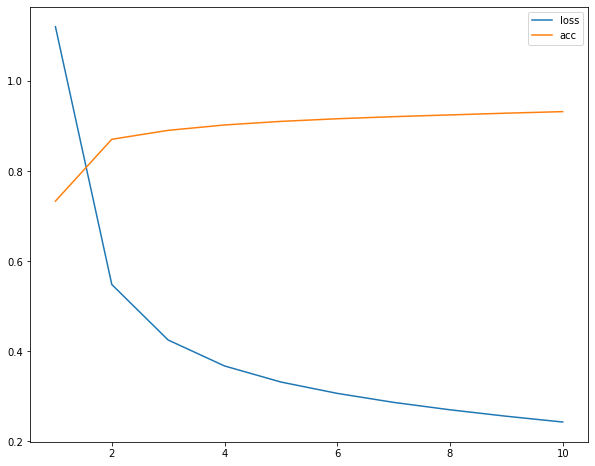

In [46]:
plt.figure(figsize=(10,8),facecolor='white')
x_lim = range(1,11)
plt.plot(x_lim,  hist.history['loss'])
plt.plot(x_lim,  hist.history['accuracy'])
plt.legend(['loss','acc'])

In [47]:
# 06. 모델 평가하기

loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)  # 최종 데이터 loss와 정확도(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2385 - accuracy: 0.9340
## evaluation loss and_metrics ##
[0.238479346036911, 0.9340000152587891]


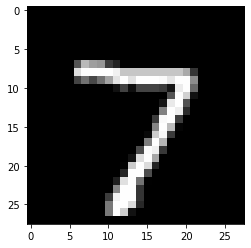

In [48]:
# 07. 모델 사용하여 예측해 보기

### x_train 의 하나의 데이터 확인
plt.imshow(X_test_n[0])

In [49]:
import numpy as np
# np.set_printoptions(precision=3) 
# 좀 더 확인하기 쉽게 표시
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.6f}".format(x)})

In [50]:
Xhat = X_test[0:1]
yhat = model.predict(Xhat)
print('## yhat ##')
print(yhat) # 각 값의 확률을 표시
print(yhat.argmax(axis=1))

## yhat ##
[[0.000362 0.000358 0.001660 0.006572 0.000069 0.000089 0.000027 0.987916
  0.000151 0.002795]]
[7]


##### 실습과제
    (1) epoch를 30으로 늘려서 확인해 보자.
        - model.evaluate()의 값 확인
    (2) epoch를 30과 Activation을 Relu로 변경후, 해보기
        - model.evaluate()의 값 확인
    (3) epoch를 30과 은닉층을 3개로 변경 후, 해보기
        - model.evaluate()의 값 확인
    (4) epoch를 30과 은닉층 2개, 노드수를 64로 늘려서 해보기
        - model.evaluate()의 값 확인

### 케라스 딥러닝 학습 조기 종료 함수 - EarlyStopping()

In [51]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [52]:
np.random.seed(3)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [53]:
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [54]:
# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 10000)
val_rand_idxs = np.random.choice(10000, 5000)

X_train = X_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

In [55]:
# 라벨링 전환
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [56]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(10000, 784) (10000, 10)
(5000, 784) (5000, 10)
(10000, 784) (10000, 10)


In [57]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [58]:
# 3. 모델의 오차함수, 최적화 함수 설정
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [59]:
# 조기 종료시키기

# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping() # 조기종료 콜백함수 정의
early_stopping = EarlyStopping(patience = 30) # 조기종료 콜백함수 정의
hist = model.fit(X_train, y_train, 
                 epochs=3000, 
                 batch_size=10, 
                 validation_data=(X_val, y_val), 
                 callbacks=[early_stopping])

Epoch 1/3000
1000/1000 [==============================] - 4s 3ms/step - loss: 1.0593 - accuracy: 0.6942 - val_loss: 0.4432 - val_accuracy: 0.8740
Epoch 2/3000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3956 - accuracy: 0.8894 - val_loss: 0.3143 - val_accuracy: 0.9126
Epoch 3/3000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3102 - accuracy: 0.9102 - val_loss: 0.2962 - val_accuracy: 0.9120
Epoch 4/3000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2643 - accuracy: 0.9229 - val_loss: 0.2588 - val_accuracy: 0.9248
Epoch 5/3000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2323 - accuracy: 0.9327 - val_loss: 0.2359 - val_accuracy: 0.9294
Epoch 6/3000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2057 - accuracy: 0.9412 - val_loss: 0.2327 - val_accuracy: 0.9300
Epoch 7/3000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1829 - accuracy: 0.9481 - val_loss: 0.2113 -

In [60]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

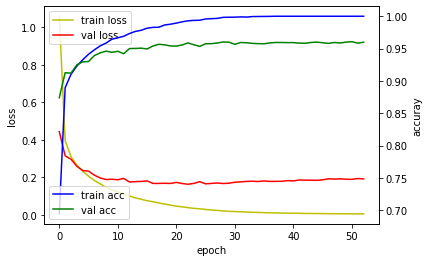

In [61]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [62]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.1900 - accuracy: 0.9558

loss : 0.18996553122997284
accuray : 0.9557999968528748
